In [1]:
#Import all of the libraries that are needed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
#given by professor for the data set
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

Accuracy for k=1: 1.0


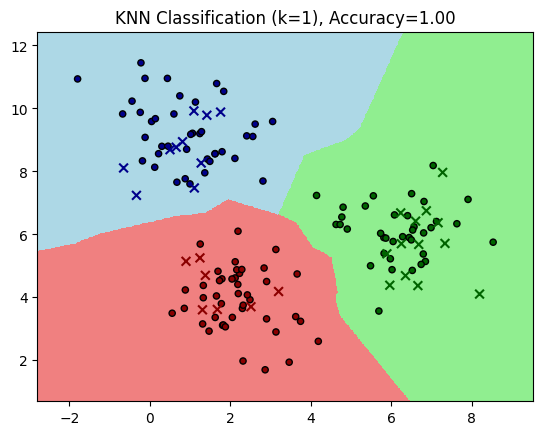

Accuracy for k=3: 1.0


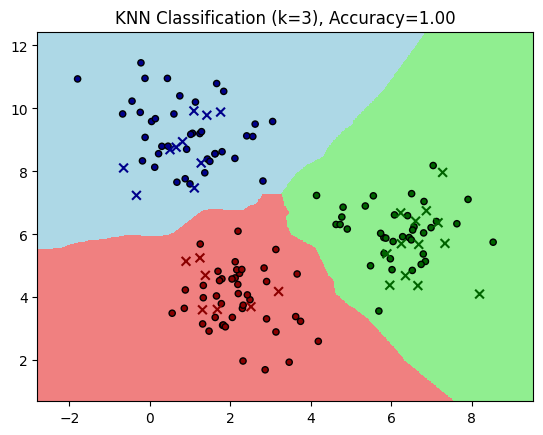

Accuracy for k=5: 1.0


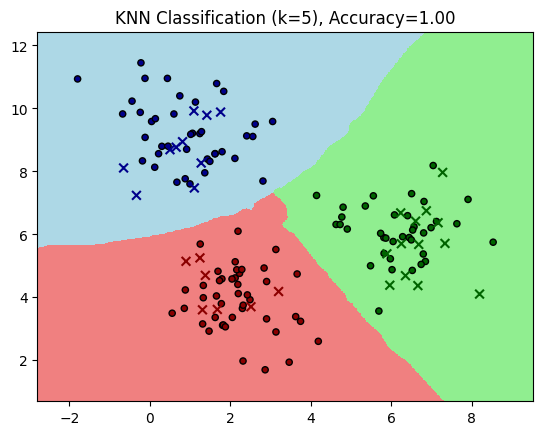

In [4]:
# 1. 80-20 split of the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 2. Perform KNN analysis
k_values = [1, 3, 5] 

with PdfPages('knn_results.pdf') as pdf:
    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(x_train, y_train)
    
# 3. Output accuracy score
        y_pred = knn_model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for k={k}: {accuracy}")

# 4. Plot results
        h = .02  # step size in the mesh
        #color schema
        cmap_light = ListedColormap(['lightcoral', 'lightgreen', 'lightblue'])
        cmap_bold = ListedColormap(['darkred', 'darkgreen', 'darkblue'])
        #creating plot map
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        #creating the lables for the points on the grid
        Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        fig, ax = plt.subplots()
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
        # Plot the training points
        ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
        # Plot the testing points
        ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, marker='x', s=40)
        #let get the title together for the actual plot
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f'KNN Classification (k={k}), Accuracy={accuracy:.2f}')
        # Save the current figure to the PDF
        pdf.savefig(fig)
        # Display the current figure in the code
        plt.show()
        # Close the current figure to start a new one for the next iteration
        plt.close(fig)
